# Graph Partitioning #
<br>
Here, we will implement graph partitioning using the Kernighan-Lin algorithm. The Kernighan-Lin algorithm is a well-known graph partitioning algorithm that aims to divide a graph into two equally-sized partitions while minimizing the edge cut between them. This algorithm is particularly useful for bipartitioning problems.

Partition 1: {1, 2}
Partition 2: {3, 4, 5}
Cut Size: 5


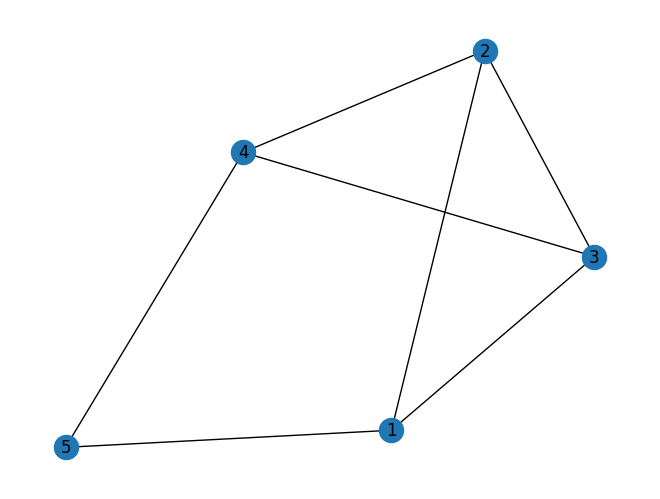

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
def kernighan_lin(graph):
    # Initialize the partitions with an arbitrary split
    nodes = list(graph.nodes())
    partition1 = set(nodes[:len(nodes) // 2])
    partition2 = set(nodes) - partition1
    
    best_partition1 = partition1.copy()
    best_partition2 = partition2.copy()
    best_cut_size = nx.cut_size(graph, partition1, partition2)

    while True:
        improvement = False
        for u in partition1:
            for v in partition2:
                # Calculate the gain of swapping nodes u and v
                gain = (
                    nx.cut_size(graph, partition1.difference({u}).union({v}),
                                partition2.difference({v}).union({u}))
                    - best_cut_size
                )

                if gain > 0:
                    best_cut_size += gain
                    partition1.remove(u)
                    partition1.add(v)
                    partition2.remove(v)
                    partition2.add(u)
                    improvement = True

        if not improvement:
            break

    return best_partition1, best_partition2, best_cut_size

# Example usage:
if __name__ == "__main__":
    # Create a graph with edges and weights
    edges = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 1), (1, 3), (2, 4)]
    weights = {edge: 1 for edge in edges}
    graph = nx.Graph()
    graph.add_edges_from(edges)

    # Call the Kernighan-Lin algorithm
    partition1, partition2, cut_size = kernighan_lin(graph)

    print("Partition 1:", partition1)
    print("Partition 2:", partition2)
    print("Cut Size:", cut_size)
    nx.draw(graph, with_labels=True)
    plt.show()